In [65]:
import pandas as pd
import os
import json

In [66]:
dt = pd.read_parquet("./unified_data/unified_df.parquet")
dt.head()

,origin,Author,AuthorDate,Committer,CommitDate,commit,files,CommitMessage,Signed-off-by
0,https://github.com/tensorflow/tensorflow.git,Manjunath Kudlur <keveman@gmail.com>,Fri Nov 6 16:27:58 2015 -0800,Manjunath Kudlur <keveman@gmail.com>,Fri Nov 6 16:27:58 2015 -0800,f41959ccb2d9d4c722fe8fc3351401d53bcf4900,"[{'action': 'A', 'added': '3', 'file': '.gitmo...",TensorFlow: Initial commit of TensorFlow libra...,None
1,https://github.com/tensorflow/tensorflow.git,Manjunath Kudlur <keveman@gmail.com>,Fri Nov 6 18:37:11 2015 -0800,Manjunath Kudlur <keveman@gmail.com>,Fri Nov 6 18:37:11 2015 -0800,cd9e60c1cd8afef6e39b4b73525d64aee33b656b,"[{'action': 'M', 'added': '60', 'file': 'READM...",TensorFlow: Upstream latest changes to Git.\n\...,None
2,https://github.com/tensorflow/tensorflow.git,Vijay Vasudevan <vrv@google.com>,Fri Nov 6 21:57:38 2015 -0800,Vijay Vasudevan <vrv@google.com>,Fri Nov 6 21:57:38 2015 -0800,8bd3b38e662a1298bebcada676c7cc6e2ea49c0f,"[{'action': 'M', 'added': '11', 'file': 'CONTR...",TensorFlow: Upstream changes to git.\n\nChange...,None
3,https://github.com/tensorflow/tensorflow.git,Vijay Vasudevan <vrv@google.com>,Sat Nov 7 10:49:41 2015 -0800,Vijay Vasudevan <vrv@google.com>,Sat Nov 7 10:49:41 2015 -0800,7de9099a739c9dc62b1ca55c1eeef90acbfa7be9,"[{'action': 'M', 'added': '15', 'file': 'READM...",TensorFlow: Upstream latest commits to git.\n\...,None
4,https://github.com/tensorflow/tensorflow.git,Vijay Vasudevan <vrv@google.com>,Sat Nov 7 13:58:24 2015 -0800,Vijay Vasudevan <vrv@google.com>,Sat Nov 7 13:58:24 2015 -0800,fddaed524622417900d745fe8f115562c55ac49a,"[{'action': 'M', 'added': '2', 'file': 'README...",TensorFlow: Upstream commits to git.\n\nChange...,None


In [67]:
dt['origin'].unique()

array(['https://github.com/tensorflow/tensorflow.git',
       'https://github.com/microsoft/vscode.git',
       'https://github.com/apache/spark.git'], dtype=object)

In [68]:
#Get Repo Name
dt['repo'] = dt['origin'].str.split('/').str[-1].str.split('.').str[-2]
dt['CommitDate'] = pd.to_datetime(dt['CommitDate'],utc=True)

In [69]:
dt.head()

,origin,Author,AuthorDate,Committer,CommitDate,commit,files,CommitMessage,Signed-off-by,repo
0,https://github.com/tensorflow/tensorflow.git,Manjunath Kudlur <keveman@gmail.com>,Fri Nov 6 16:27:58 2015 -0800,Manjunath Kudlur <keveman@gmail.com>,2015-11-07 00:27:58+00:00,f41959ccb2d9d4c722fe8fc3351401d53bcf4900,"[{'action': 'A', 'added': '3', 'file': '.gitmo...",TensorFlow: Initial commit of TensorFlow libra...,None,tensorflow
1,https://github.com/tensorflow/tensorflow.git,Manjunath Kudlur <keveman@gmail.com>,Fri Nov 6 18:37:11 2015 -0800,Manjunath Kudlur <keveman@gmail.com>,2015-11-07 02:37:11+00:00,cd9e60c1cd8afef6e39b4b73525d64aee33b656b,"[{'action': 'M', 'added': '60', 'file': 'READM...",TensorFlow: Upstream latest changes to Git.\n\...,None,tensorflow
2,https://github.com/tensorflow/tensorflow.git,Vijay Vasudevan <vrv@google.com>,Fri Nov 6 21:57:38 2015 -0800,Vijay Vasudevan <vrv@google.com>,2015-11-07 05:57:38+00:00,8bd3b38e662a1298bebcada676c7cc6e2ea49c0f,"[{'action': 'M', 'added': '11', 'file': 'CONTR...",TensorFlow: Upstream changes to git.\n\nChange...,None,tensorflow
3,https://github.com/tensorflow/tensorflow.git,Vijay Vasudevan <vrv@google.com>,Sat Nov 7 10:49:41 2015 -0800,Vijay Vasudevan <vrv@google.com>,2015-11-07 18:49:41+00:00,7de9099a739c9dc62b1ca55c1eeef90acbfa7be9,"[{'action': 'M', 'added': '15', 'file': 'READM...",TensorFlow: Upstream latest commits to git.\n\...,None,tensorflow
4,https://github.com/tensorflow/tensorflow.git,Vijay Vasudevan <vrv@google.com>,Sat Nov 7 13:58:24 2015 -0800,Vijay Vasudevan <vrv@google.com>,2015-11-07 21:58:24+00:00,fddaed524622417900d745fe8f115562c55ac49a,"[{'action': 'M', 'added': '2', 'file': 'README...",TensorFlow: Upstream commits to git.\n\nChange...,None,tensorflow


In [70]:
import matplotlib.pyplot as plt

## Line plots showing commits per month for each repository.
* We can identify which repository has the highest or most consistent activity

In [71]:
df = dt.copy()

In [72]:
df['CommitDate'] = pd.to_datetime(df['CommitDate'],utc=True)
df.set_index('CommitDate',inplace = True)
bymonth = df.groupby('repo').resample('M').size().reset_index(name='count')

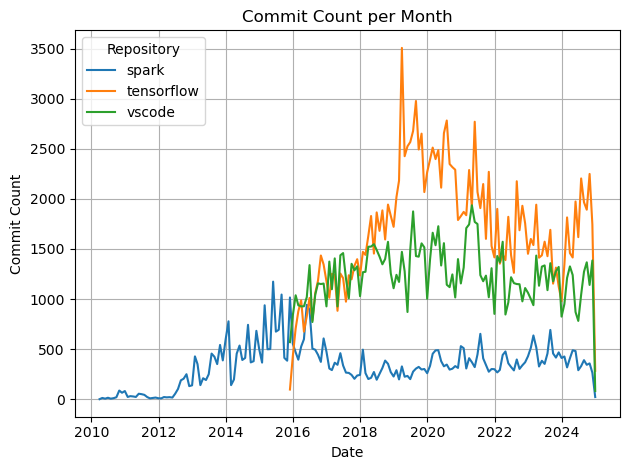

In [73]:
for r,g in bymonth.groupby('repo'):
    plt.plot(g['CommitDate'],g['count'],label=r)

plt.title('Commit Count per Month')
plt.xlabel('Date')
plt.ylabel('Commit Count')
plt.legend(title='Repository', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## The average number of files modified per day:

In [74]:
df = dt.copy()

In [75]:
files = []
for file in df['files']:
    fn = []
    for f in file:
        fn.append(f['file'])
    files.append(fn)
df['files'] = files

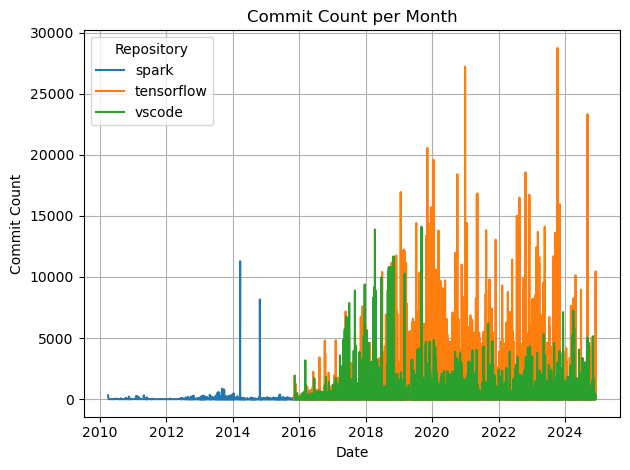

In [76]:
df['cf'] = df['files'].apply(lambda x : len(set(x)))
group = df.groupby(['repo','CommitDate'])['cf'].mean().reset_index(name='count')

for r,g in group.groupby('repo'):
    plt.plot(g['CommitDate'],g['count'],label=r)

plt.title('Commit Count per Month')
plt.xlabel('Date')
plt.ylabel('Commit Count')
plt.legend(title='Repository', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Top Contributors:
* Identifying the core contributors driving the projects

In [77]:
df = dt.copy()

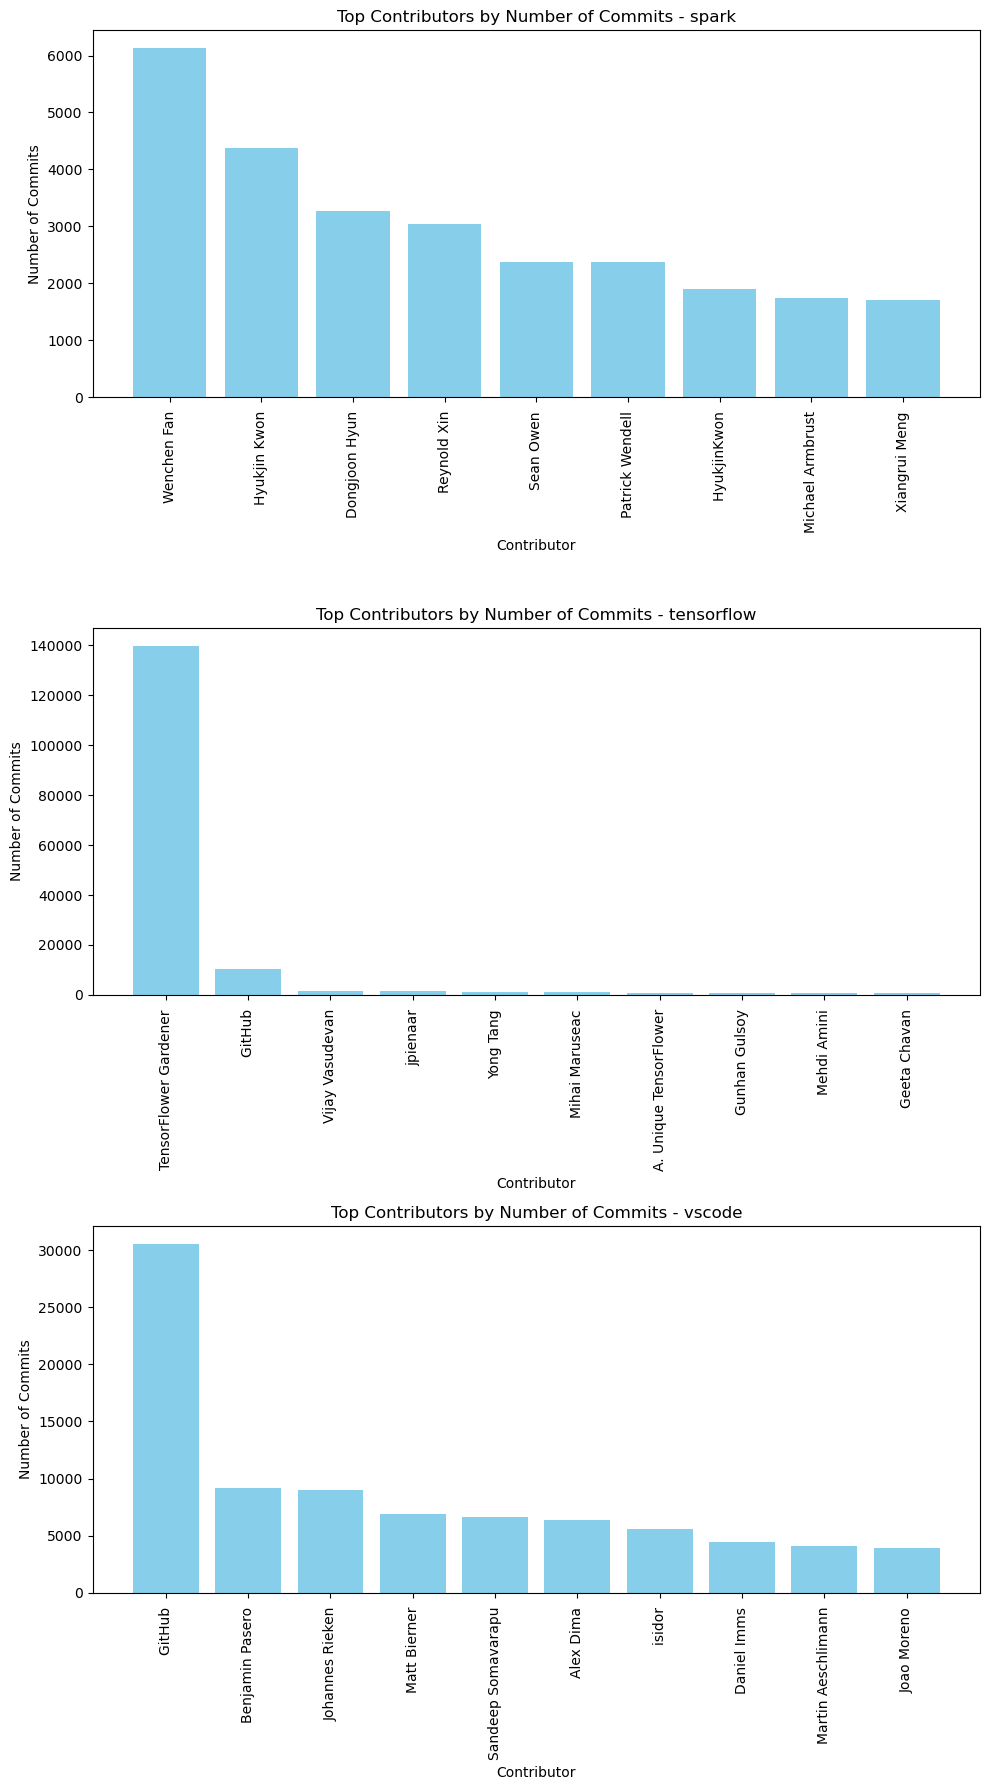

In [78]:
commits_per_contributor = df.groupby(['repo', 'Committer']).size().reset_index(name='count')


top_contributors = commits_per_contributor.groupby('repo').apply(
    lambda x: x.nlargest(10, 'count') 
).reset_index(drop=True)

top_contributors['Committer'] = top_contributors['Committer'].str.split('<').str[0]

repositories = top_contributors['repo'].unique()

num_repos = len(repositories)

fig, axes = plt.subplots(num_repos, 1, figsize=(10, 6 * num_repos), sharex=False)

for ax, repo in zip(axes, repositories):
    repo_data = top_contributors[top_contributors['repo'] == repo]
    ax.bar(repo_data['Committer'], repo_data['count'], color='skyblue')
    ax.set_title(f"Top Contributors by Number of Commits - {repo}")
    ax.set_ylabel('Number of Commits')
    ax.set_xlabel('Contributor')
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

##  Trends in contributor activity over time
* the plot shows periods of high or low collaboration .

In [79]:
df['month'] = df['CommitDate'].dt.to_period('Y')
cot = df.groupby(['repo','month'])['Committer'].nunique().reset_index() # contributors_over_time
committer_pivot = cot.pivot(index='month',columns='repo',values='Committer')

/var/folders/j0/gz2_fmsn0696r482g0lb2xc40000gn/T/ipykernel_47539/1853089715.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['CommitDate'].dt.to_period('Y')


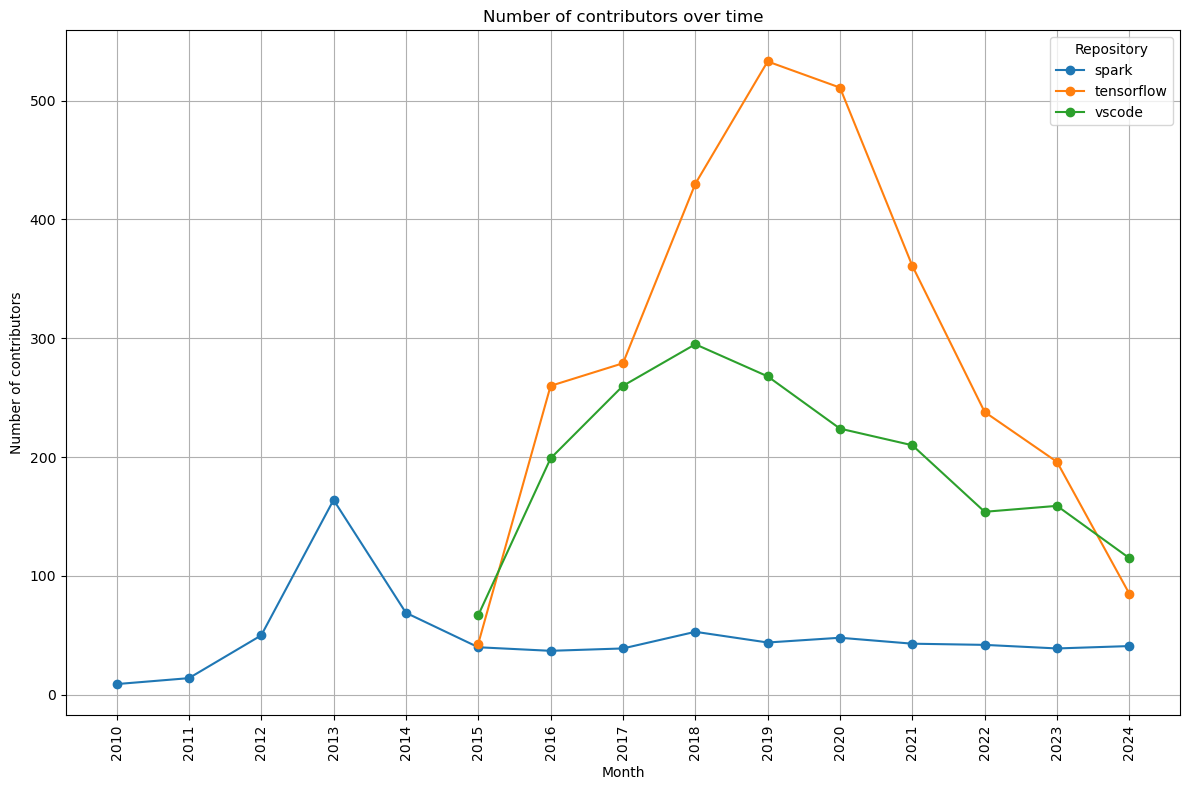

In [80]:
plt.figure(figsize=(12, 8))

for repo in committer_pivot.columns:
    plt.plot(committer_pivot.index.astype(str), committer_pivot[repo], marker='o', label=repo)

plt.title('Number of contributors over time')
plt.xlabel('Month')
plt.ylabel('Number of contributors')
plt.xticks(rotation=90)
plt.legend(title="Repository")
plt.grid()
plt.tight_layout()
plt.show()

## Heatmap showing commits per day of the week for each repository.
* shows when contributors are most active and compare working patterns.

In [81]:
df=dt.copy()

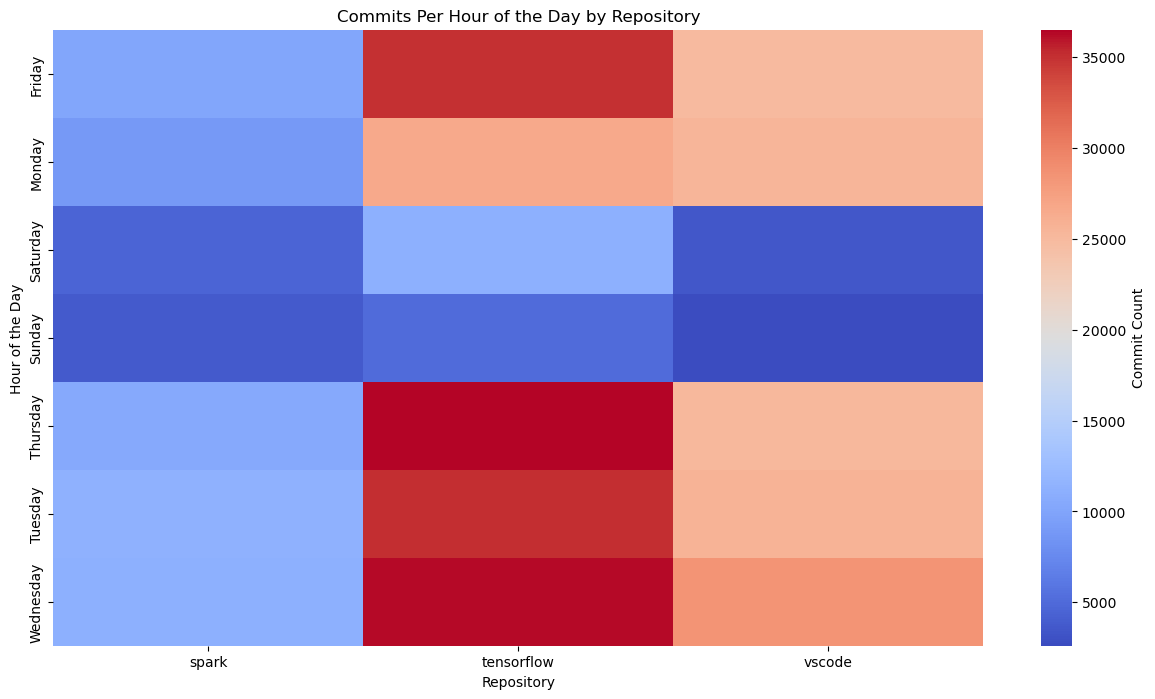

In [82]:
import seaborn as sns
df['hour'] = df['CommitDate'].dt.hour
df['dow'] = df['CommitDate'].dt.day_name()

hourly_commits = df.groupby(['repo', 'dow']).size().reset_index(name='count')

heatmap_data = hourly_commits.pivot(index='dow', columns='repo', values='count').fillna(0)

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=False, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Commit Count'})
plt.title('Commits Per Hour of the Day by Repository')
plt.xlabel('Repository')
plt.ylabel('Hour of the Day')
plt.show()

## 	Tree map showing the most frequently changed files for each repository.

In [110]:
df = dt.copy()

In [111]:
files = []
for file in df['files']:
    fn = []
    for f in file:
        fn.append(f['file'])
    files.append(fn)
df['files'] = files
df = df.explode('files')

In [112]:
grouped = df.groupby(['repo', 'files']).size().reset_index(name='count')
top10 = grouped.groupby('repo').apply(lambda x: x.nlargest(10,'count')).reset_index(drop=True)

In [113]:
import plotly.express as px

# Prepare data
for repo in repositories:
    repo_data = top10[top10['repo'] == repo]
    
    fig = px.treemap(
        repo_data,
        path=['repo', 'files'],  # Full paths in the hierarchy
        values='count',
        title=f'Top 10 Most Frequently Changed Files in {repo}'
    )
    fig.update_traces(textinfo="label+value")  # Show both labels and values
    fig.show()

## Pie chart showing distribution of changes by file type 

In [128]:
df['filetype'] = df['files'].str.split('.').str[-1]

file_type_distribution = df.groupby(['repo', 'filetype']).size().reset_index(name='count')
top10 = file_type_distribution.groupby('repo').apply(lambda x: x.nlargest(10,'count')).reset_index(drop=True)

repositories = top10['repo'].unique()
for repo in repositories:
    repo_data = top10[top10['repo'] == repo]
    
    fig_pie = px.pie(
        repo_data,
        names='filetype',
        values='count',
        title=f'Distribution of Changes by File Types in {repo}',
        hole=0.5 
    )
    fig_pie.update_traces(textinfo='percent+label')
    fig_pie.show()